In [14]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as pyplot
from matplotlib import rcParams
import math
import matplotlib

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from collections import defaultdict

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import rcParams

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

colour_palette = ["#808000", "#ff4500", "#000000", "#46fab8", "#addaff", "#1e90ff"]

sns.set_palette(sns.color_palette(colour_palette))

rcParams['figure.figsize'] = 12, 8

tqdm.pandas()


In [15]:
pl.seed_everything(42)

Seed set to 42


42

In [17]:
df = pd.read_csv(r"C:\Users\sathv\OneDrive\Desktop\Major Project\uqvitalsignsdata\combined_output.csv")
df = df.sort_values(by='Time').reset_index(drop=True)
df

,Time,HR,Pulse,SpO2,Perf,etCO2,imCO2,etN2O,inN2O,MAC,...,inO2,Tidal Volume,Minute Volume,RR,ECG,Pleth,CO2,AWP,AWF,AWV
0,00:00:00_000,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.305,0.36850,0.0,0.54707,11.79334,0.0
1,00:00:00_010,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.310,0.36801,0.0,0.57335,11.76310,0.0
2,00:00:00_020,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36728,0.0,0.58127,11.73633,0.0
3,00:00:00_030,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.325,0.36630,0.0,0.55086,11.79232,0.0
4,00:00:00_040,55,55.0,100.0,0.4,0,0,0.0,0.0,0.0,...,98,0,0.0,0,-0.330,0.36508,0.0,0.54186,11.67379,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,01:59:59_950,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.40098,36.7,8.17264,44.69420,593.5
719996,01:59:59_960,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.165,0.39780,36.7,8.13857,44.88082,600.9
719997,01:59:59_970,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39658,36.7,8.12056,44.71950,608.4
719998,01:59:59_980,51,51.0,98.0,3.0,39,1,0.0,0.0,0.4,...,95,882,6.1,8,-0.160,0.39609,36.7,8.11281,44.32515,615.8


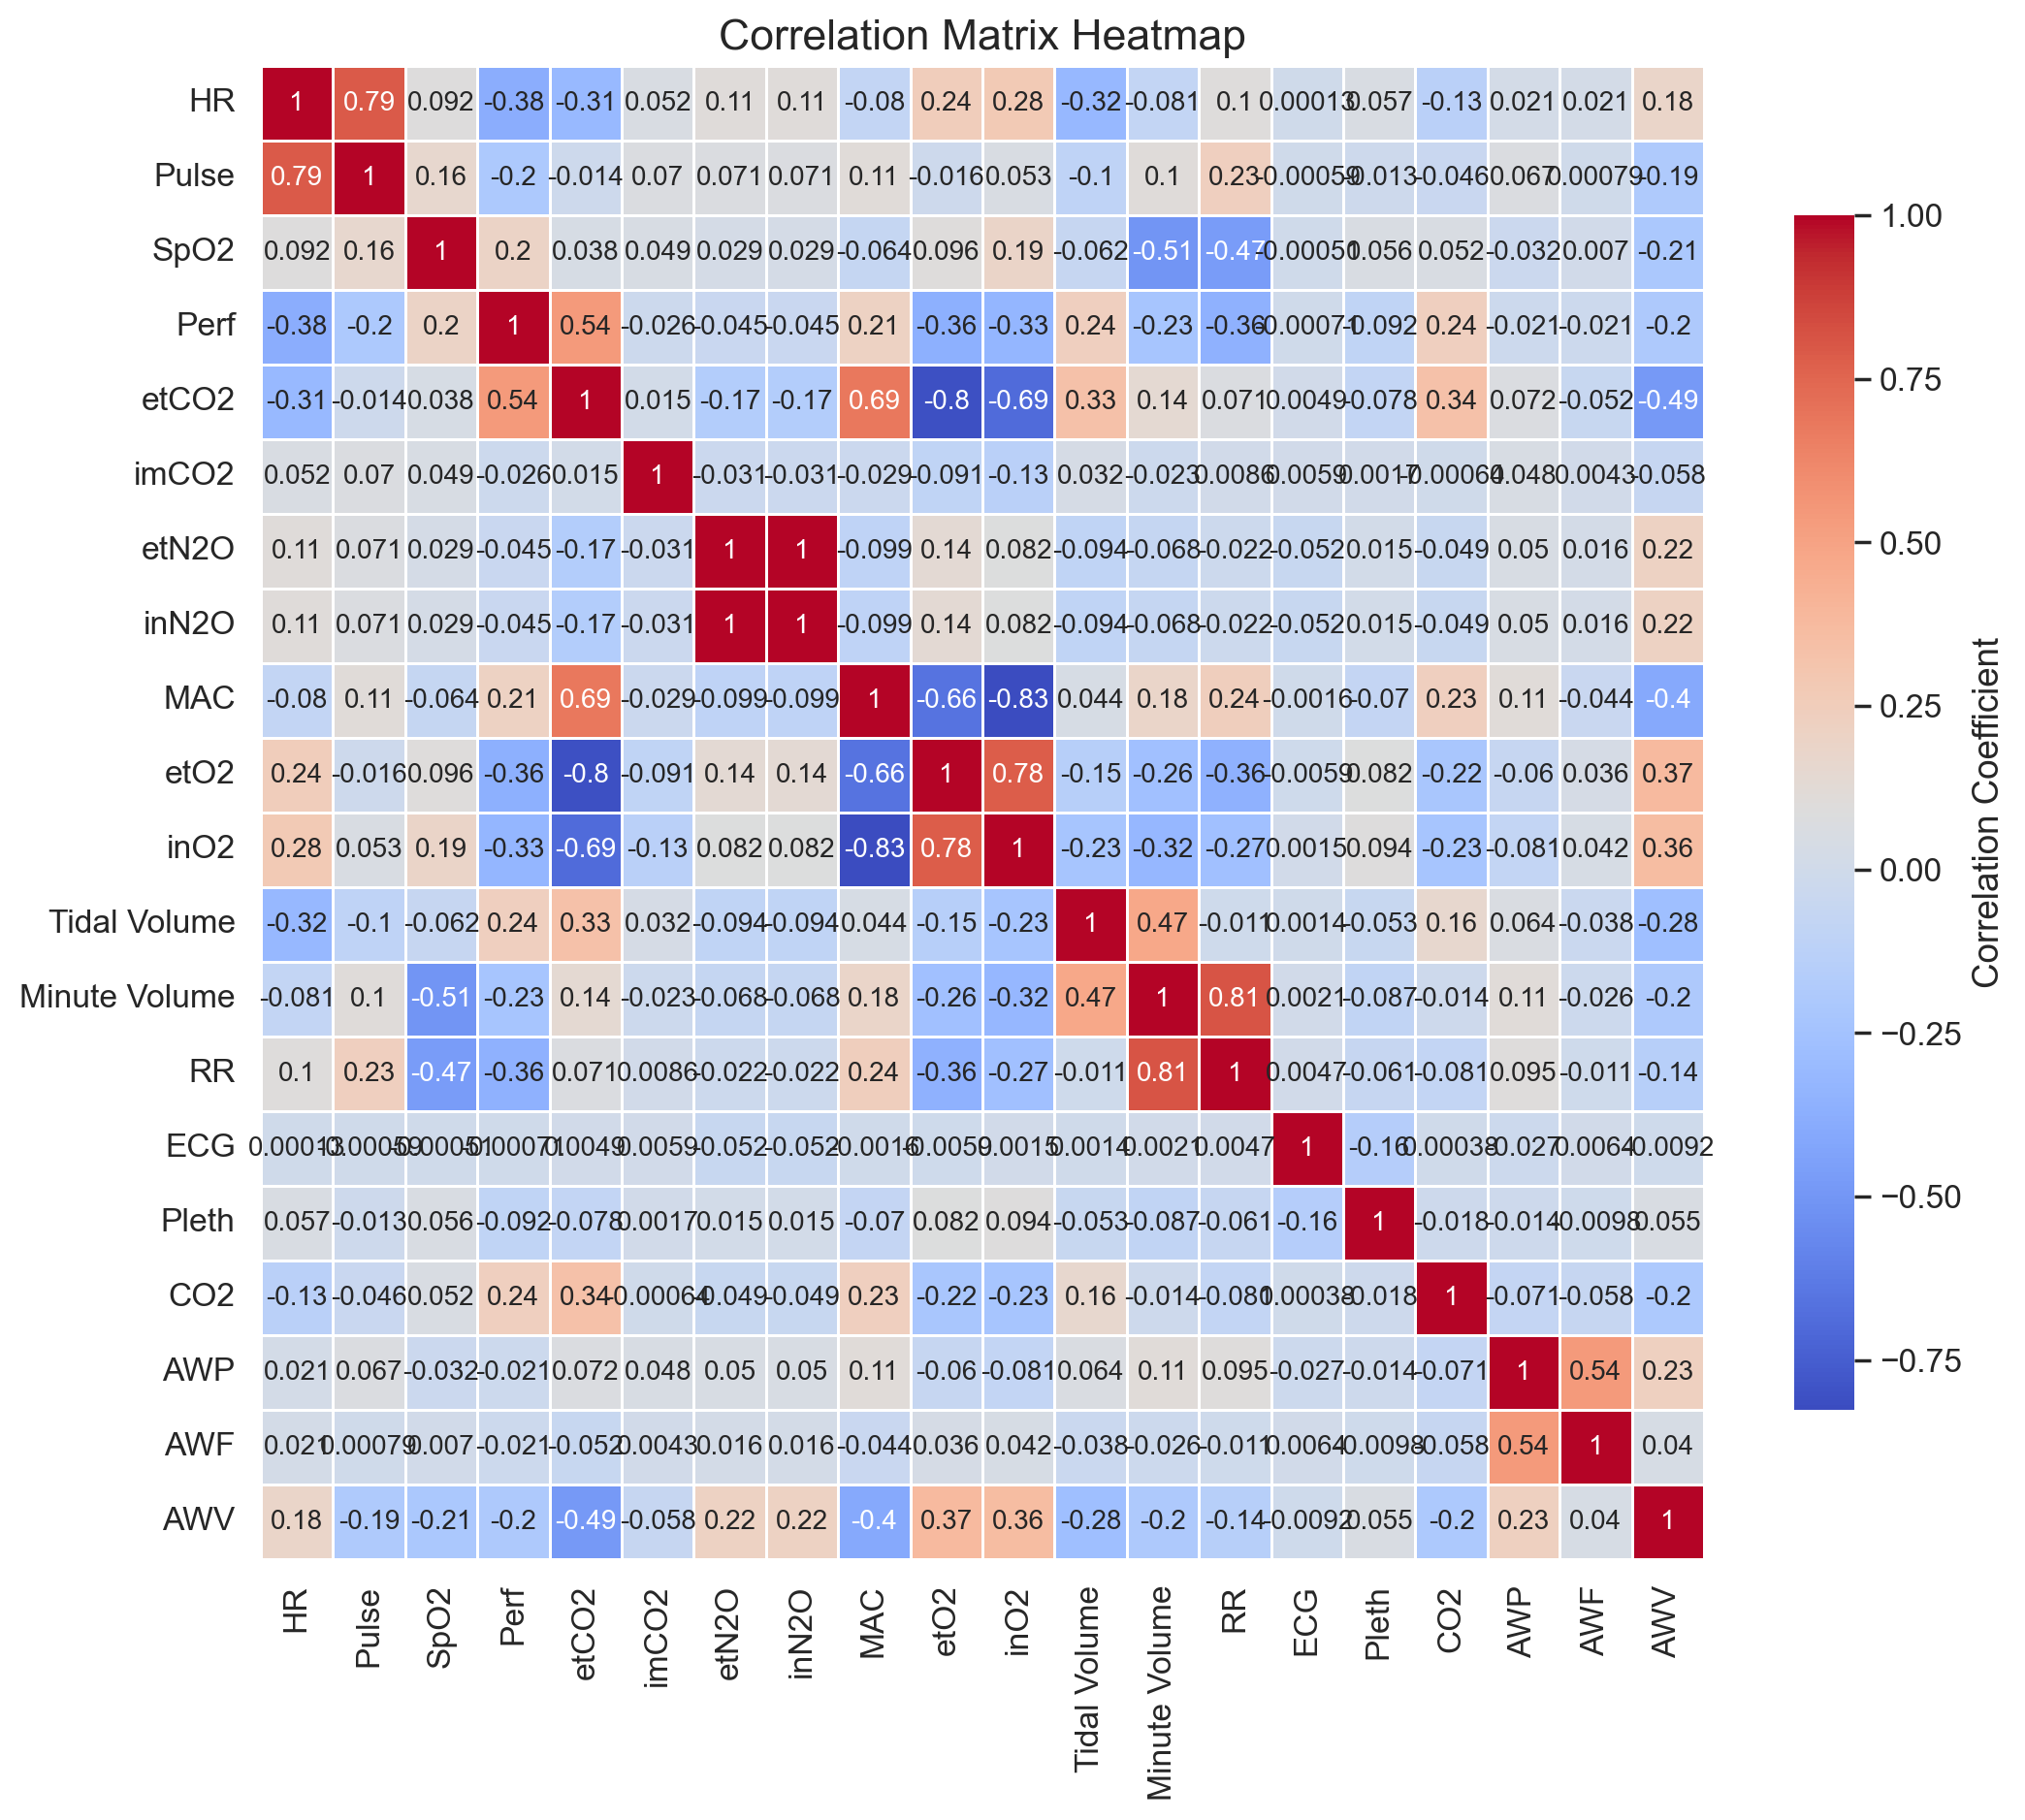

In [22]:
# Compute the correlation matrix for columns from the second onward
corr = df.iloc[:, 1:].corr()

# Set up the figure size and style for clarity
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)  # Increase font size for clarity

# Create the heatmap with additional customizations
sns.heatmap(
    corr, 
    annot=True, 
    cmap="coolwarm",  # Use a diverging palette for better contrast
    linewidths=0.5, 
    annot_kws={"size": 10},  # Set annotation font size
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Customize color bar
)

# Add title for context
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

In [19]:
df.shape

(720000, 21)